## TASK 3

In [12]:
import os 
import pandas as pd

#Define a base directory
base_path = "C:/Users/HP/Downloads/Pizza+Place+Sales/pizza_sales"

#To create the full path
orders_path = os.path.join(base_path, "orders.csv")
order_details_path = os.path.join(base_path, "order_details.csv")
pizzas_path = os.path.join(base_path, "pizzas.csv")
pizza_types_path = os.path.join(base_path, "pizza_types.csv")

In [18]:
#Load the CSV files
orders = pd.read_csv(orders_path)
order_details = pd.read_csv(order_details_path)
pizzas = pd.read_csv(pizzas_path)
pizza_types = pd.read_csv(pizza_types_path, encoding='latin1')

#### To see the first 5 rows of each dataset 

In [20]:
print("orders:")
print(orders.head())

orders:
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30


In [21]:
print("order_details:")
print(order_details.head())

order_details:
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1


In [28]:
print("pizzas:")
print(pizzas.head())


pizzas:
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75


In [25]:
print("pizza_types:")
print(pizza_types.head())

pizza_types:
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...  


#### To merge the 4 CSV file together:

In [ ]:
df = pd.merge(orders, order_details, on = "order_id")
df = pd.merge(df, pizzas, on = "pizza_id")
df = pd.merge(df, pizza_types, on = "pizza_type_id")
print(df.head())

#### 1) To calculate the Total Revenue:

In [36]:
df["total"] = df["quantity"] * df["price"]
total_revenue = df["total"].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


#### 2) To find the Total Quantity Sold:

In [50]:
total_quantity = df["quantity"].sum()

print(f"Total Quantity Sold: {total_quantity}")

Total Quantity Sold: 49574


#### 3) To find the Total Orders:

In [52]:
total_orders = orders["order_id"].nunique()

print(f"Total Orders: {total_orders}")

Total Orders: 21350


#### 4) To find the Number of Pizza Types:

In [53]:
pizza_type_count = df["pizza_type_id"].nunique()

print(f"Number of Pizza Types: {pizza_type_count}")

Number of Pizza Types: 32


#### 5) To find the Average Price of the Pizzas:

In [61]:
average_price = df[["pizza_id", "price"]].drop_duplicates()["price"].mean()

print(f"Average Price of the Pizzas: ${average_price:,.2f}")

Average Price of the Pizzas: $16.51


#### To find the Peak Hours of Sales: 

In [64]:
df["order_time"] = pd.to_datetime(df["time"], format= "%H:%M:%S")
df["hour"] = df["order_time"].dt.hour
peak_hours = df.groupby("hour")["price"].sum().sort_values(ascending= False)

print(f"The Peak Hours of Sales are: {peak_hours}")

The Peak Hours of Sales are: hour
12    108047.75
13    102550.95
18     88334.20
17     85128.10
19     71665.50
16     69129.40
14     57650.20
20     57420.75
15     52231.30
11     43978.80
21     41769.30
22     22548.40
23      1121.35
10       285.70
9         83.00
Name: price, dtype: float64


##### NOTE: The 12PM hour(noon) i.e between 12:00 PM to 12:59 PM is the top peak sales hour and it was also seen that Hours between (12-1 PM) and (5-7 PM) is when you expect the pizza place to be the busiest and they made sales during this time. The Hour between (9-10 AM) and (After 10 PM) appears to be the time where very little sales is being made.

#### To visualize it using barplot;

Matplotlib is building the font cache; this may take a moment.


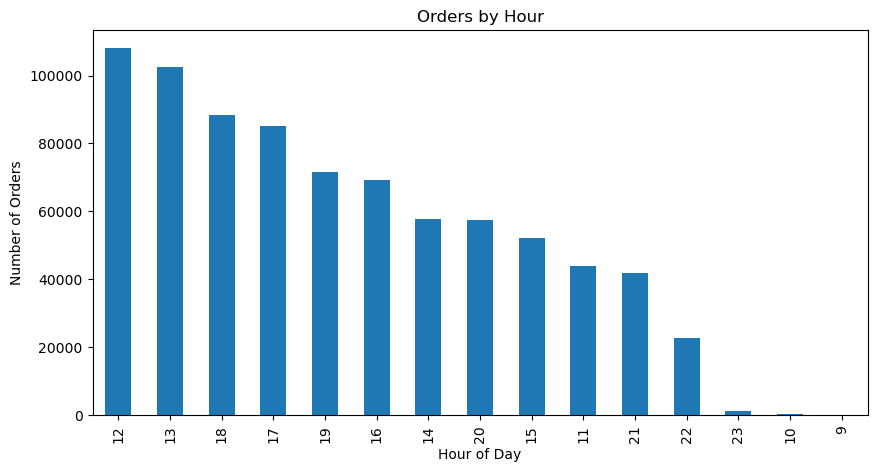

In [65]:
import matplotlib.pyplot as plt

peak_hours.plot(kind="bar", figsize= (10, 5), title="Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()




#### 7) To find the Total Sales made on each Day of the Week:

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["day_of_the week"] = df["order_date"].dt.day_name()
sales_by_day = df.groupby("day_of_week")["total"].sum().sort_values(ascending=False)

In [71]:
print(df.columns)

Index(['order_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'Total', 'total', 'total_quantity', 'order_time', 'hour', 'order_date',
       'day_of_the week'],
      dtype='object')


#### 8) To find the Top 5 Selling Pizzas:

In [75]:
top_5_pizzas = df.groupby("pizza_id")["quantity"].sum().sort_values(ascending=False).head(5)
print(f"The Top 5 Selling Pizzas are: {top_5_pizzas}")

The Top 5 Selling Pizzas are: pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64


#### To visualize it using a bar plot;

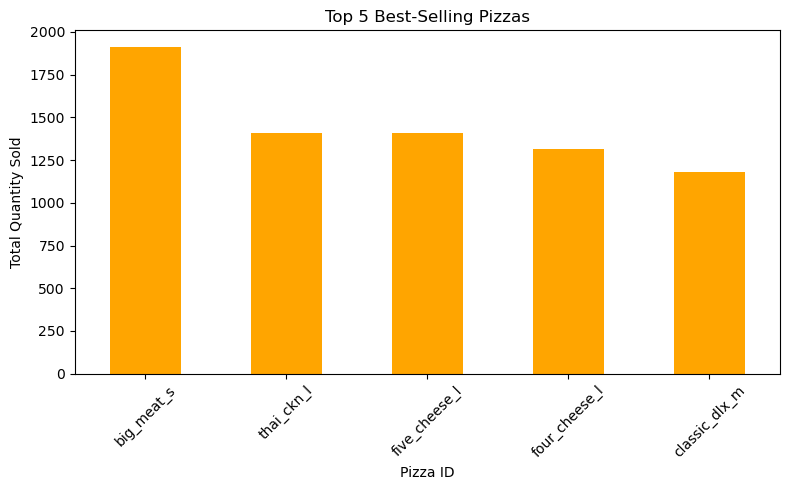

In [76]:
top_5_pizzas.plot(kind="bar", figsize= (8,5), color="orange", title= "Top 5 Best-Selling Pizzas")
plt.xlabel("Pizza ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 9) To find the Monthly Sales Trends:

In [94]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)
monthly_sales = df.groupby("month")["price"].sum().sort_index()

print(f"Monthly Sales Trends are: {monthly_sales}")

Monthly Sales Trends are: month
January      68472.70
February     64067.40
March        69198.00
April        67286.20
May          69939.35
June         66796.30
July         71027.45
August       67068.80
September    63018.00
October      62566.50
November     69054.00
December     63450.00
Name: price, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_9680\2367576914.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby("month")["price"].sum().sort_index()


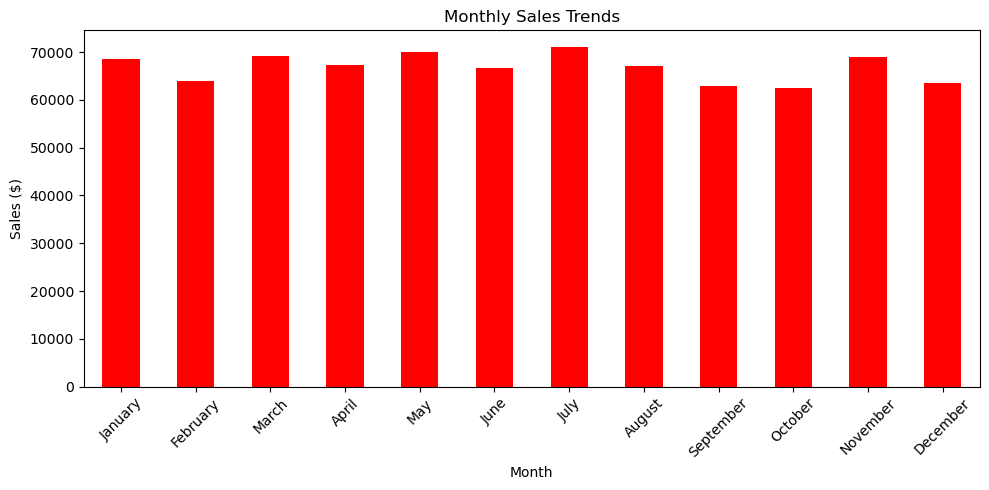

In [95]:
monthly_sales.plot(kind="bar", figsize= (10,5), color="red", title= "Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### NOTICEABLE TRENDS: July had the highest sales overall ($71,027.45), May and March were also strong performers. September and October shows the lowest performance. 

#### 10) To find the Poorly Performing Pizza Types:

In [97]:
lowest_selling = df.groupby("pizza_type_id")["quantity"].sum().sort_values().head(5)
print(f"The Least 5 Selling Pizza type are: {lowest_selling}")

The Least 5 Selling Pizza type are: pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64


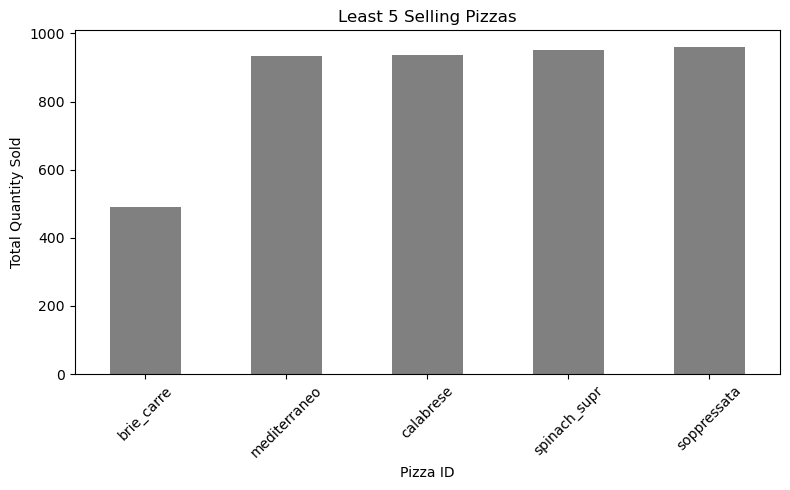

In [99]:
lowest_selling.plot(kind="bar", figsize= (8,5), color="gray", title= "Least 5 Selling Pizzas")
plt.xlabel("Pizza ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Yes, there are pizza types not doing well on the menu e.g brie_carre, mediterraneo, calabrese, spinach_supr and soppressata.